In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing_prices.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
df[df.isnull().sum()[df.isnull().sum() < 100].keys()].isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [6]:
df.dropna(subset=df.isnull().sum()[df.isnull().sum() < 100].keys(), inplace=True)

In [7]:
df.drop(columns=df.isnull().sum()[df.isnull().sum() > 0].keys(), inplace=True)

In [8]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [9]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 74, dtype: object

In [10]:
num_df = df.select_dtypes(include=['int64', 'float64'])

In [11]:
num_df.dtypes

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:
num_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
num_df.drop(columns=['Id'], inplace=True)
num_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
features = num_df.drop(columns = 'SalePrice', axis=1)
prices = num_df['SalePrice']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn import linear_model

In [17]:
total = 0
maxScore = 0
for i in range(200):
  X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.3)

  linear_reg = linear_model.LinearRegression()

  linear_reg = linear_reg.fit(X_train, y_train)

  temp = linear_reg.score(X_test, y_test)
  total = total + temp
  if (temp > maxScore): 
    maxScore = temp
    bestCoef = linear_reg.coef_

print(total/200)
print(maxScore)

0.7469126172491208
0.8763044316212616


In [18]:
for i in range(X_train.keys().size):
    print(X_train.keys()[i], bestCoef[i])

MSSubClass -190.5965036452954
LotArea 0.31392469627851527
OverallQual 18841.731841759418
OverallCond 4855.942254258394
YearBuilt 328.04855269390964
YearRemodAdd 142.256414084031
MasVnrArea 32.45638143584656
BsmtFinSF1 7.433628777662903
BsmtFinSF2 1.6204304909234823
BsmtUnfSF -0.9928680282038607
TotalBsmtSF 8.061191239729546
1stFlrSF 9.381618445237873
2ndFlrSF 14.24332570396725
LowQualFinSF 1.9124132343189895
GrLivArea 25.537357383484398
BsmtFullBath 9616.223827001348
BsmtHalfBath 3256.554442241906
FullBath 4123.669662440379
HalfBath -2907.6697313110726
BedroomAbvGr -9956.283094074583
KitchenAbvGr -22408.20844639073
TotRmsAbvGrd 6636.379187977005
Fireplaces 5735.910018611596
GarageYrBlt -36.051603440996
GarageCars 15518.851159788743
GarageArea 4.242565437171335
WoodDeckSF 29.912757299981106
OpenPorchSF -9.777826296811009
EnclosedPorch 10.845180307995731
3SsnPorch 58.650860445187206
ScreenPorch 87.70300468647059
PoolArea -2.5225964029118817
MiscVal -0.3814650947714228
MoSold -261.8631331

In [19]:
max(bestCoef)

18841.731841759418

In [20]:
dummies_df = pd.get_dummies(df, columns=df.select_dtypes(exclude=['number']).columns, dtype=float)

In [21]:
dummies_df.shape

(1338, 262)

In [22]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()

In [25]:
encoded_df = df.copy()

In [26]:
for col in encoded_df.select_dtypes(exclude=['number']).columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

In [27]:
encoded_df.dtypes

Id               int64
MSSubClass       int64
MSZoning         int32
LotArea          int64
Street           int32
                 ...  
MoSold           int64
YrSold           int64
SaleType         int32
SaleCondition    int32
SalePrice        int64
Length: 74, dtype: object

In [28]:
encoded_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [29]:
encoded_X = encoded_df.drop(columns = 'SalePrice', axis=1)
encoded_Y = encoded_df['SalePrice']

In [30]:
total = 0
maxScore = 0
bestCoef = 0
for i in range(200):
  eX_train, eX_test, ey_train, ey_test = train_test_split(encoded_X, encoded_Y, test_size = 0.3)

  linear_reg = linear_model.LinearRegression()

  linear_reg = linear_reg.fit(eX_train, ey_train)

  temp = linear_reg.score(eX_test, ey_test)
  total = total + temp
  if (temp > maxScore): 
    maxScore = temp
    bestCoef = linear_reg.coef_

print(total/200)
print(maxScore)

0.754407864373729
0.8685300183680382


In [31]:
for i in range(encoded_X.keys().size):
    print(encoded_X.keys()[i], bestCoef[i])

Id -0.3950344244834011
MSSubClass -255.55832594890276
MSZoning 265.4226294629033
LotArea 0.27537887024922725
Street 45716.15428552205
LotShape -1425.1275135020294
LandContour 4949.714483045182
Utilities -68264.79292815259
LotConfig -465.1905347296641
LandSlope 12856.037200660812
Neighborhood 589.192853739642
Condition1 377.0396727228085
Condition2 -9528.278020907717
BldgType 2068.7176518278334
HouseStyle -1833.0875739179755
OverallQual 11965.247575604582
OverallCond 4017.7419374219694
YearBuilt 207.36582797459573
YearRemodAdd -11.423583706105092
RoofStyle 2520.0272657081823
RoofMatl 6419.812086511159
Exterior1st -1147.1590308053721
Exterior2nd 147.94764520615308
MasVnrArea 25.692810052113828
ExterQual -8583.829089421472
ExterCond 2212.4954815761644
Foundation 3812.1403203600603
BsmtQual -7902.730200152464
BsmtCond 1913.5992748006338
BsmtExposure -5100.891257820777
BsmtFinType1 -945.3302756798319
BsmtFinSF1 -3.4509292229377024
BsmtFinType2 2318.0105892155807
BsmtFinSF2 8.799036686643376

In [32]:
max(bestCoef)

45716.15428552205

In [33]:
sorted(bestCoef)

[-68264.79292815259,
 -15129.388819462714,
 -9528.278020907717,
 -9333.932883303169,
 -8583.829089421472,
 -7902.730200152464,
 -5969.95409419747,
 -5100.891257820777,
 -3254.338966035578,
 -1833.0875739179755,
 -1425.1275135020294,
 -1147.1590308053721,
 -1084.4319909649275,
 -1079.4326587878259,
 -1046.9192630008783,
 -945.3302756798319,
 -815.6971345782786,
 -465.1905347296641,
 -413.33194856721934,
 -255.55832594890276,
 -231.24259538287993,
 -131.261674643044,
 -28.185823933559732,
 -23.087587947744396,
 -18.563013962379046,
 -11.423583706105092,
 -7.151901705583441,
 -3.4509292229377024,
 -1.803794229244886,
 -0.6271235119493213,
 -0.3950344244834011,
 0.27537887024922725,
 4.364102825034934,
 4.679489474953925,
 8.799036686643376,
 10.308972456747142,
 13.394476692391777,
 20.431947129023683,
 21.012875390359113,
 23.995821129912656,
 25.692810052113828,
 26.44568257586434,
 29.79428835264389,
 38.79630364966488,
 147.94764520615308,
 207.36582797459573,
 265.4226294629033,
 377

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
sns.set(rc={"figure.figsize":(20,12)})

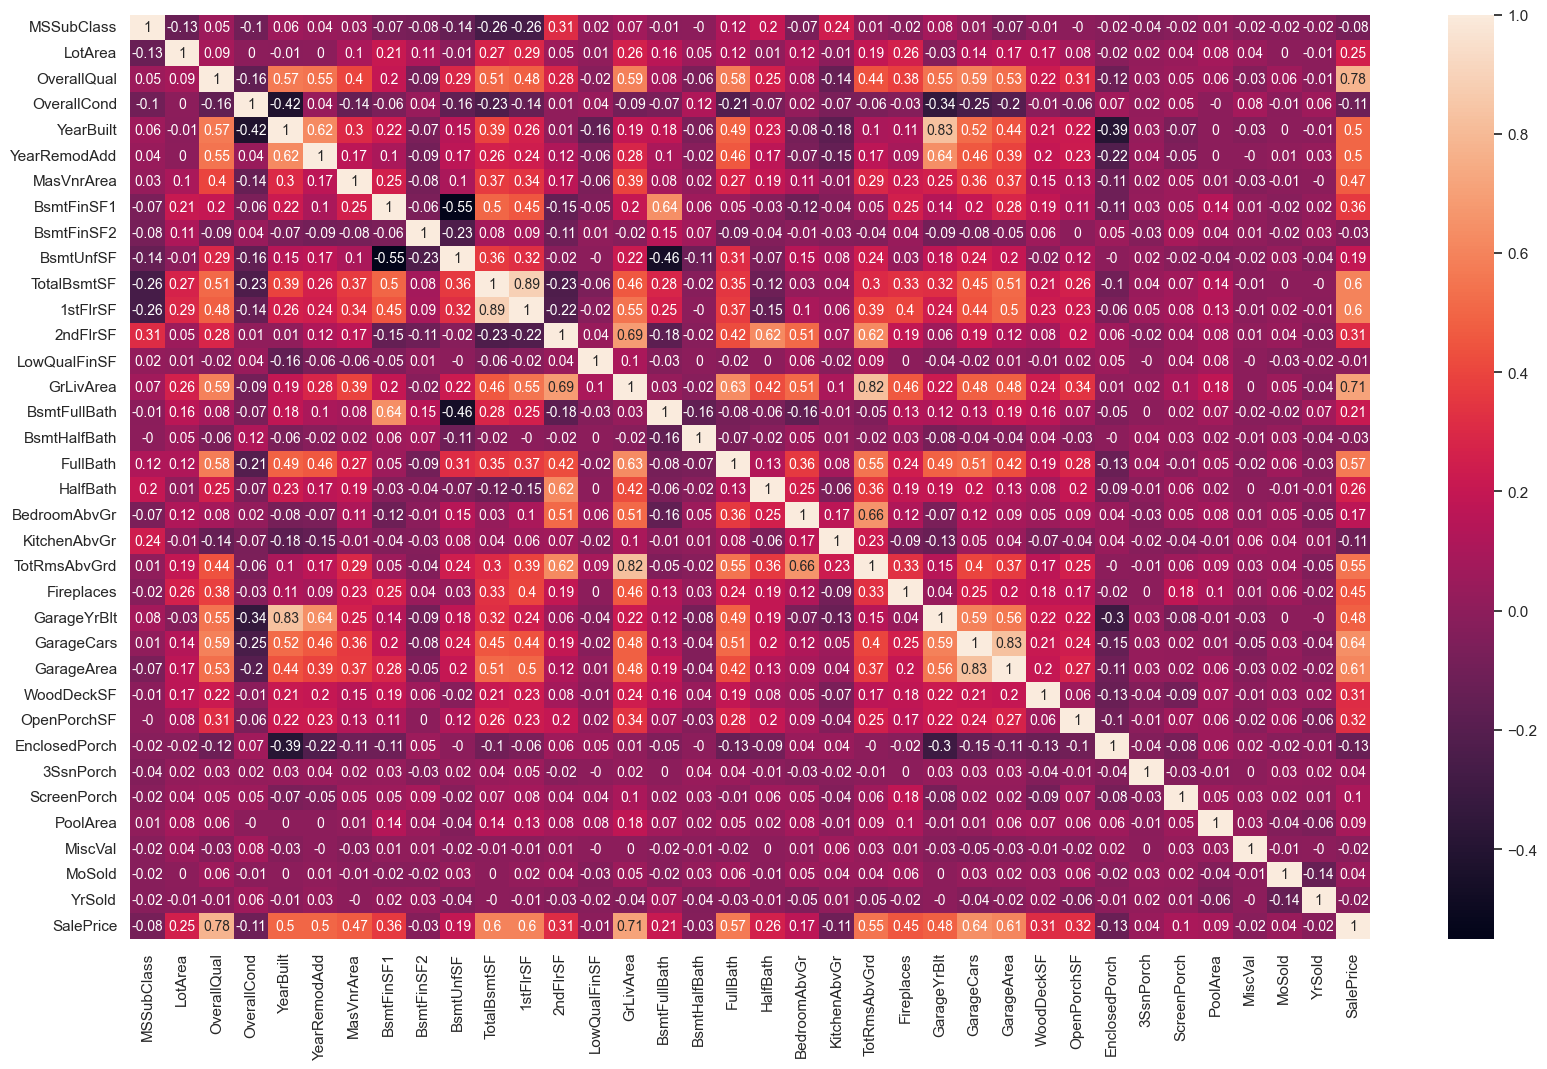

In [46]:
corr = num_df.corr().round(2)
corrMap = sns.heatmap(corr, annot=True, annot_kws={"size": 10})

In [47]:
corrMap.get_figure().savefig('heatmap.png', bbox_inches='tight')